In [1]:
##### This code is from Updated Testing Reddit - No Con- bias (Fictitious Play)-01092022
##### This code replace the big real datanetwork with small sythetic network 
import scipy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import time
import random
from scipy.stats import beta
import pandas as pd
import copy
%matplotlib inline
#%run pure_strategy_selection.ipynb  #include simple selection algorithm
import scipy.io
import collections
import sys
from itertools import count

## Mathmatic Functions

In [2]:
# centers the opinion vector around 0\n",
def mean_center(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return x
    
# compute number of edges, m\n
def num_edges(L, n):
    m = 0
    for i in range(n):
        for j in range(n):
            if i > j and L[i,j] < 0:
                m += 1            
    return m

# maximizing polarization only: \\bar{z}^T \\bar{z}   
def obj_polarization(A, L, op, n):
    op_mean = mean_center(op, n)
    z_mean = np.dot(A, op_mean) 
    return np.dot(np.transpose(z_mean), z_mean)[0,0] 

# def obj_polarization_1(A, L, op, n):  #z_mean is the same as s_mean - according to Stanford paper theory
#     z = np.dot(A, op) 
#     z_mean = mean_center(z, n)
#     return np.dot(np.transpose(z_mean), z_mean)[0,0] 

# Calculate innate polarization
def obj_innate_polarization(s, n):  
#     np.set_printoptions(precision=5)
    op_mean = mean_center(s, n)
    return np.dot(np.transpose(op_mean), op_mean)[0,0]

In [3]:
# Parameters for the network

np.set_printoptions(precision=3)

## Creating Network
### 1. Make Random Network

There are 34 agents
[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]
34


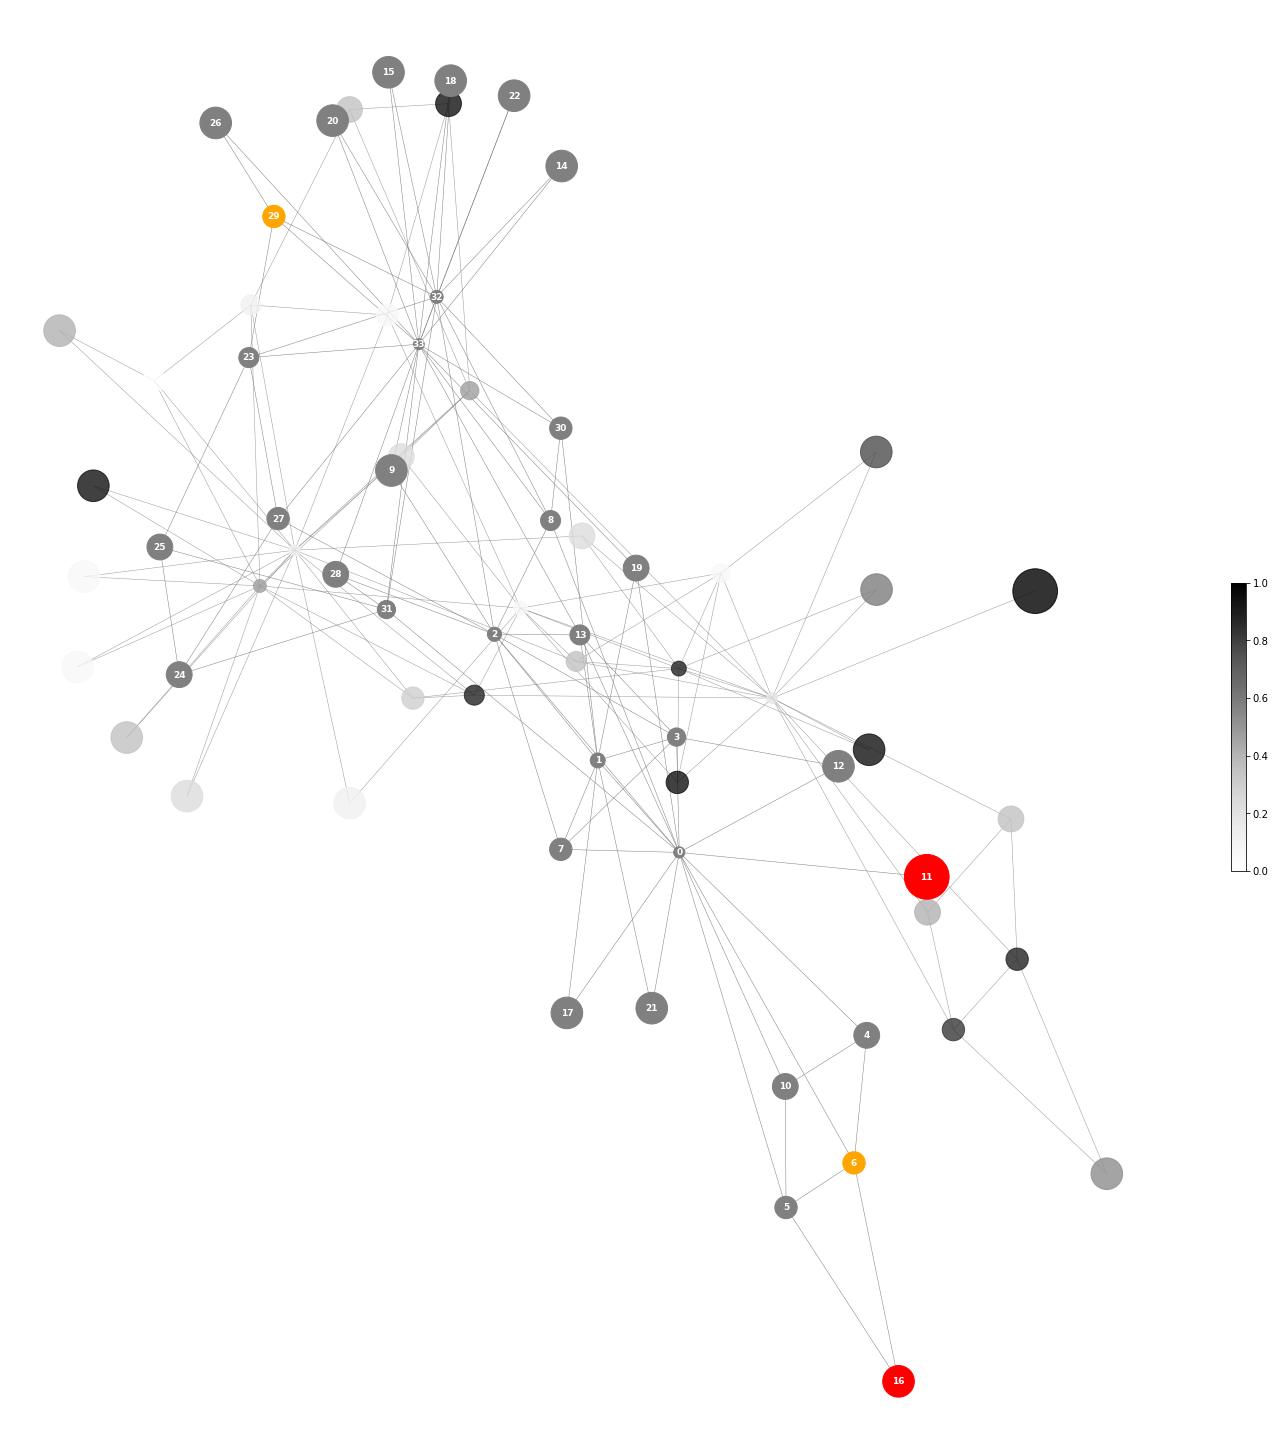

In [5]:
G = nx.karate_club_graph()
# print("Node Degree")
n = 0
edges = []

for v in G:
    a = f"{G.degree(v):6}"
#     print(f"{v:4} {G.degree(v):6}")
    edges.append(a)
    n = n + 1
print('There are ' + str(n) + ' agents')


############################ Make Adjacency Matrix #####################################
ZKC_graph = nx.karate_club_graph()
G = nx.convert_matrix.to_numpy_matrix(ZKC_graph)
print(G)

# n = 0
# for v in ZKC_graph:
#     a = f"{v:4} {G.degree(v):6}"
#     print(f"{v:4} {G.degree(v):6}")
#     n = n + 1

############################ Make Innate Opinion ################################
##create two set of weights connected with density 1) inviduals  2) individual & informaton Source
c1 = np.sort(np.random.choice(n, n, replace=False)) #assume (1-r) are individuals
# print('c1')
# print(c1)
l1 = len(c1)


##### Import Innate opinion
df = pd.read_csv ('Karate Innate Opinion.csv')
s_1 = np.array(df[df.columns[1]])

s = np.reshape(s_1, (34, -1))
# print(s)
s_use = s.flatten()   # Convert array to a list for later operation
s_use = s_use.tolist()
new_s = [i * 30 for i in s_use]
df = pd.DataFrame(new_s, columns=['Opinion']) #create a datafram with index at column 1, opinion at column 2

######################### Calculate Key Values & Visualization #######################################3
L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
m = num_edges(L, n)                    # call the function to calculate the number of edges
columnsum_ij = np.sum(A, axis=0)
# print(columnsum_ij)
print(n)
# what the twitter graph looks like 
nxG = nx.from_numpy_matrix(G)          
plt.figure(figsize=(20, 20))



############ create node size
def node_edge(G, n):
    edges =[]
    for v in range(n):
        a = np.array(np.nonzero(G[v])[0])
        edge = len(a)
#         print(edge)
        edges.append(edge)
        
    return edges

node_edges = node_edge(G, n)
# print(node_edges)

    
node_sizes =[]
for i in node_edges:
    node_size = 1/i*2000
    node_sizes.append(node_size)
    
# print(node_sizes)


########## Create Node color
# create color map
min_equi = [6,29]
max_equi = [11,16]

color_map = []
for node in nxG:
    if node in min_equi:
        color_map.append('orange')
    elif node in max_equi: 
        color_map.append('Red')  
    else:
        #color_map.append('#1f77b4')  
        color_map.append('grey') 


# Fix seed - fix network shape
my_pos = nx.spring_layout(nxG, seed = 25)
nx.draw(nxG, with_labels=False, node_color=df['Opinion'].astype(int),cmap=plt.cm.Greys, node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=9, font_weight='bold', alpha=0.8)
nx.draw(nxG, pos = my_pos, with_labels= True, node_color=color_map, node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=9, font_weight='bold')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Greys, norm=plt.Normalize(vmin = 0, vmax=1))
# vmin = min(s)
# vmax = max(s)
#sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm,shrink=0.2)
plt.show()


In [7]:
def node_edge(G, n):
    edges =[]
    for v in range(n):
        a = np.array(np.nonzero(G[v])[0])
        edge = len(a)
#         print(edge)
        edges.append(edge)
        
    return edges

node_edges = node_edge(G, n)
node_sizes = node_edges*10
print(type(node_edges))

min_equi = [6,29]
max_equi = [11,16]

# min_equi = [245,284]
# max_equi = [50,481]
plt.figure(figsize=(10, 10))

# nxG = nx.from_numpy_matrix(G)

# create color map
color_map = []
for node in nxG:
    if node in min_equi:
        color_map.append('orange')
    elif node in max_equi: 
        color_map.append('Red')  
    else:
        #color_map.append('#1f77b4')  
        color_map.append('grey') 


# create node color map value
s_use = s.flatten()
s_use = s_use.tolist()
new_s = [i * 30 for i in s_use]
df = pd.DataFrame(new_s, columns=['Opinion'])

# create node size map
# def node_edge(G, n):
#     edges =[]
#     for v in range(n):
#         a = np.array(np.nonzero(G[v])[0])
#         edge = len(a)
# #         print(edge)
#         edges.append(edge)
        
#     return edges

# node_edges = node_edge(G, n)

node_sizes =[]
for i in node_edges:
    node_size = 1/i*300
    node_sizes.append(node_size)
# print(node_sizes)


# draw graph
#nx.draw_networkx(G, pos=pos, font_size=16, node_color='blue', font_color='white')
nx.draw(nxG, with_labels=False, node_color=df['Opinion'].astype(int), cmap=plt.cm.Greys,node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=9, font_weight='bold', alpha=0.8)


# draw subgraph for highlights
my_pos = nx.spring_layout(nxG, seed = 100)
nx.draw(nxG, pos = my_pos, with_labels=False, node_color=color_map, node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=9, font_weight='bold')

sm = plt.cm.ScalarMappable(cmap=plt.cm.Greys, norm=plt.Normalize(vmin = 0, vmax=1))
# vmin = min(s)
# vmax = max(s)
#sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm,shrink=0.2)
plt.show()
# # #net.show('Reddit.html')
# # # plt.show()



<class 'list'>


NameError: name 'nxG' is not defined

<Figure size 720x720 with 0 Axes>

### 4. Equilibrium & Polarization  - based on derivation
$$P(z) = z ^T * z $$


In [6]:

## s =  make_innat_opinions(n, c1)
# print('Innate Opinion')
# print(s)
# print('Equilibrium Opinion')
# print(np.dot(A, s))

op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, s, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)

Innate_polarization:
1.1743186020487546
Equi_polarization:
0.15967526924290512
Difference:
-1.0146433328058495


### Testing players' behavior

In [7]:
def random_play(s,n):  # player randomly choose an agent and randomly change the agent
    
    op = copy.copy(s)
  
    v = random.randint(0,n-1)  # randomly select an agent index
#     print(v)
    new_op = random.randint(0, 1)  # randomly select an opininon between 0 and 1
#     print(new_op)
    
    # Store old opinion
    old_opinion = op[v,0]
    
    #update the opinion
    op[v,0] = new_op 
#     print('Only 1 opinion changed')
#     print(op)
    print("    "+"Agent" + str(v) +" 's opinion " + str(old_opinion) + " changed to "+ str(new_op))
    por = obj_polarization(A, L, op, n)
    
    #restore op op array to innate opinion
    op[v] = old_opinion
    print("Network reaches equilibrium Polarization: " + str(por))
#     print('Should be restored')
#     print(op)
    return (v, new_op, por)





In [8]:
def random_play1(s,n):  # player randomly choose an agent and randomly change the agent
    
    op = copy.copy(s)
#     max_opi_option = random.uniform(0, 1)   # options that maximizer have
    
    v = random.randint(0,n-1)  # randomly select an agent index
#     print(v)
#     v = 1
    new_op = random.uniform(0, 1)  # randomly select an opininon between 0 and 1
    #new_op = 0
#     print(new_op)
    
    # Store old opinion
    old_opinion = op[v,0]
    
    #update the opinion
    op[v,0] = new_op 
#     print('Only 1 opinion changed')
#     print(op)
    print("    "+"Agent" + str(v) +" 's opinion " + str(old_opinion) + " changed to "+ str(new_op))
    por = obj_polarization(A, L, op, n)
    
    #restore op op array to innate opinion
    op[v] = old_opinion
    print("Network reaches equilibrium Polarization: " + str(por))
#     print('Should be restored')
#     print(op)
    return (v, new_op, por)





In [9]:
## Testing to see if random_play works -- NO NEED TO RUN
# min_touched =[]
# (v1, maxmize_op, innat_equi_por, max_por) = choose_max_vertex(s, n, min_touched)
# print(v1, maxmize_op, innat_equi_por, max_por)

In [10]:
## Testing to see if random_play works -- NO NEED TO RUN
# (v1, max_opinion, max_pol) = random_play(s,n)
# (v2, min_opinion, min_pol) = random_play(s,n)

In [11]:
def maximizer_fir_play(s,n,min_touched):    # maxmizer first-time play, greedy algorithm
    op = copy.copy(s)

    print('Maximizer Play')

    max_champion = choose_max_vertex(op, n, min_touched) # The best choice among all opinions and vertexs, function is in "pure_strategy_selection.ipynb"
    (v1, max_opinion, innate_obj, max_pol) = max_champion # find agent v1, and max_opinion that can maxmize the equi_polarization(max_pol)

    if v1 == None:   # if maximizer cannot find one
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
#         print('v1', 'changed_opinion', 'innate_obj', 'obj')
#         print(max_champion)

        #Store innate_op of the max_selected vertex
        old_opinion_max = op[v1, 0]
        ##### change the agent's opinion with best action(agent v1, max_op)
        op[v1,0] = max_opinion
        ## check if agent's opinionis is changed or not
        print("    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
        print("Network reaches equilibrium Polarization: " + str(max_pol))


    return(v1, max_opinion, max_pol)

In [12]:
# max_touched = []
# min_touched = []
# (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)
# print(v1, max_opinion, max_pol)

In [13]:
##### minimizer first-time play, greedy algorithm
def minimizer_fir_play(s,n,max_touched): 
    
    op = copy.copy(s)
    print('_______________________')
    print('Minimizer Play')
#     print('Only 1 opinion changed')
#     print(op)
    
    min_champion = choose_min_vertex(op, n, max_touched)
    (v2, min_opinion, innat_equi_por, min_pol) = min_champion
    
   #Store innate_op of the min_selected vertex
    old_opinion_min = op[v2,0]
    
    if v2 == None:
        print('Minimizer fail')

    else:
        print("                                ")
        print("Minimizer finds its target agent:")

        ##### change the agent's opinion
        op[v2,0] = min_opinion   #-------------------------------------------------> store minimize strategy


        print("    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))

        print("Network reaches equilibrium Polarization: " + str(min_pol))
#         print('2 opinion changed')
#         print(op)

    return (v2,min_opinion, min_pol)

In [14]:
# max_touched = []
# min_touched = []
# (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)
# print(v2, min_opinion, min_pol)

In [15]:
## Testing above functions
# min_touched=[]
# max_touched=[]
# # Game start from maximizer random play
# print('Maximizer random selection')
# (v1, max_opinion, max_pol) = random_play(s,n)
# max_touched.append(v1)
# # print('v1, max_opinion, max_pol')
# # print(v1, max_opinion, max_pol)
# # store maximizer play history, using agent(row) and changed opinion(column) as indicator to locate history




# # Game start from minimizer random play 
# print('Minimizer random selection')
# (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)
# min_touched.append(v2)



In [16]:
# Row are Column are depended on min and max's choice: agent v and opinion 
def row_index(v2, min_opinion):
    row = 11*v2 + min_opinion*10 
    return int(row)
def column_index(v1,max_opinion):
    column = 2*v1 + max_opinion
    return int(column)  #the python dataframe index

### Mixed Strategy Payoff


In [236]:
def make_payoff_row(op1,v2):
    payoff_row = np.zeros(2*n)

#     print('one opinion changed -min')
#     print(op1)
    for column in range(2*n):
#         print(column)
        v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
        max_opinion = column%2
#         print(v1, max_opinion)
        # update the maximizer's change to the opinion array that has changed by minimizer(op1)
        op2 = copy.copy(op1)
#         temp = op1[v1]
        op2[v1,0] = max_opinion

        # calculate the polarization with both max and min's action
        payoff_row[column] = obj_polarization(A, L, op2, n)
#         op1[v1,0] = temp # restore
#         print(op2,payoff_row[column])

        ############# CAN DELETE 
#         if column==33:
# #         print('max_opinion')
# #         print(v1, max_opinion)
#             print('_________________________Payoff row start')
#             print('two opinion changed -min +  max')
#             print(op2)
        
    # when v1 == v2, the polarization should be negative for max, infinet for min. 
    # Replace the the column_index of agent v2 with 0 for max
    j_1 = 2*v2 + 0
    j_2 = 2*v2 + 1
    payoff_row[j_1] = -100
    payoff_row[j_2] = -100
    
    return payoff_row

In [237]:
# #(1,0) (2,0.3928571428571428)
# op1=copy.copy(s)
# print(op1)

op1 = copy.copy(s)
# print(op1)
op1[2,0] = 1  #op1 is the opinion array that updated by minimizer
# print(op1)
payoff_row_1 = make_payoff_row(op1,2)
print(payoff_row_1)


[   0.139    0.2      0.137    0.17  -100.    -100.       0.15     0.205
    0.149    0.229    0.132    0.195    0.132    0.191    0.142    0.176
    0.176    0.159    0.186    0.171    0.149    0.224    0.165    0.213
    0.163    0.2      0.157    0.178    0.228    0.164    0.21     0.154
    0.15     0.252    0.144    0.191    0.204    0.149    0.166    0.183
    0.191    0.139    0.158    0.211    0.194    0.14     0.182    0.121
    0.223    0.16     0.195    0.162    0.229    0.144    0.174    0.147
    0.179    0.161    0.181    0.115    0.174    0.16     0.179    0.151
    0.19     0.131    0.175    0.121]


### Minimizer Mixed Strategy

In [238]:
#NEEDDDDDDD UPDAE

# Calculate polarization of minimizer's Mixed Strategy
def mixed_min_polarization(s,v2,weight_op,fla_max_fre):

    op1 =  copy.copy(s) # make a copy of the innate opinion array 
    op1[v2,0] = weight_op # then only updated by minimizer's current change
#     print('Min update')
#     print(v2, weight_op)
    # calculate the polarization with both min(did here) and max's action(in make_payoff_row)
    payoff_row = make_payoff_row(op1,v2)  # the vector list out 2*n payoffs after min's action combine with 2*n possible max's actions
    #print(payoff_row)

    # Replace the the column_index of agent v2 with 100 for min
    j_1 = 2*v2 + 0
    j_2 = 2*v2 + 1
    payoff_row[j_1] = 100
    payoff_row[j_2] = 100
    
#     print('Min Payoff Row')
#     print(payoff_row)
    #calculate fictitious payoff - equi_min  
    payoff_cal = payoff_row * fla_max_fre # fla_max_fre recorded the frequency of each maximizer's action, frequency sum = 1
                                             # payoff (2*n array) * maximizer_action_frequency (2*n array)
# can DELETE - use to check if function works as expected
#     if v2 ==6 and v1==16:
#         print('Payoff row')
#         column = column_index(16,1)
#         print(payoff_row[column],column)
#         print('fla_max_fre')
#         print(np.nonzero(fla_max_fre))
#         print(fla_max_fre [np.nonzero(fla_max_fre)])
#         print('compare to: '+str(fla_max_fre[column]))
    
    mixed_pol = np.sum(payoff_cal) # add up all, calculate average/expected payoff


#     print('min_mixed_polarization')
#     print(mixed_pol)
        # Replace the the column_index of agent v2 with 100 for min

    payoff_row[j_1] = -100
    payoff_row[j_2] = -100

    return (mixed_pol,payoff_row)


In [189]:
# # op2=op
# # op2[0,0]=1
# # min_opinion1 = derivate_s(op2,n,1)
# # # print(min_opinion1)
# # min_opinion2 = derivate_s1(op2,n,1)
# # print(min_opinion2)
# v2 = 254
# min_opinion = 0
# (mixed_pol, payoff_row) = mixed_min_polarization(s,v2,min_opinion,fla_max_fre)
# print(np.nonzero(fla_max_fre))

In [268]:
def derivate_s(op,n,v2):
               #op - opinion array that updated by maximizer
    c = [1/n] * n
#     print(c)
    sum_term = 0
    j = 0

    sum_term = np.dot(np.dot((A-c),(A[v2]-c)),op)  # sum up all terms
    
    term_out = op[v2]*np.dot((A[v2]-c),(A[v2]-c)) # exclude the term that j = v2
    sum_s = sum_term - term_out    # numerator
    
    s_star = -sum_s/np.dot((A[v2]-c),(A[v2]-c))
    s_star = s_star[0] #take value out of array
    min_opinion =min(max(0,s_star),1)
    
#     print('Min opinion-should be unique')
#     print(min_opinion)
    return min_opinion

# def derivate_s1(op,n,v2):
#                #op - opinion array that updated by maximizer
#     c = [1/n] * n
# #     print(c)
#     sum_term = 0
#     j = 0
#     for j in range(0,n):
#         term = op[j]*np.dot(np.transpose(A[j]-c),(A[v2]-c))
# #             print(A[j])
# #             print(A[v])
#         sum_term = sum_term + term  # sum up all terms
    
#     term_out = op[v2]*np.dot(np.transpose(A[v2]-c),(A[v2]-c)) # exclude the term that j = v2
#     sum_s = sum_term - term_out    # numerator
    
#     s_star = -sum_s/np.dot(np.transpose(A[v2]-c),(A[v2]-c))
#     s_star = s_star[0] #take value out of array
#     min_opinion =min(max(0,s_star),1)
            
#     return min_opinion



def min_mixed_opinion(op, n, v2, fla_max_fre):
    
    weight_op = 0
    
    # loop for each max_action(in total 2*n) 
    for column in range(2*n):

        if fla_max_fre[column] !=0:
            v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
            max_opinion = column%2
            
##             temp = op[v1,0] 
          
##             op[v1,0]= max_opinion #update innate opinion array with max_action  

            min_opinion = derivate_s(op, n, v2)# find min_s_star for each max_action
#             print(fla_max_fre[column],min_opinion)
            print(min_opinion)
            op1 = copy.copy(op)
            op1[v2] = min_opinion
            min_por = obj_polarization(A, L, op1, n)
            #(min_por, row) = mixed_min_polarization(s, v2, min_opinion,fla_max_fre)

    
            weight_op = weight_op + fla_max_fre[column]*min_opinion # sum up p_i*s_i

    print('Weighted opinion')
    print(weight_op)
    
    (mixed_por, payoff_row) = mixed_min_polarization(s, v2, weight_op,fla_max_fre)
    
    print('Weighted polarization')
    print(mixed_por)
    
    return(weight_op,payoff_row,mixed_por)  

In [280]:
## Print out weighted opinion proved that we need to do this step insetead of min_mixed_opinion - we are weighting
# different min_opinion here
def min_mixed_opinion_1(s, n, v2, fla_max_fre):
    
    weight_op = 0
    
    # loop for each max_action(in total 2*n) 
    for column in range(2*n):

        if fla_max_fre[column] !=0:
            v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
            max_opinion = column%2
            op = copy.copy(s)
            op[v1] = max_opinion
#             print(op)

#             print('Weight')
#             print(fla_max_fre[column])
            min_opinion = derivate_s(op, n, v2)# find min_s_star for each max_action


            
            op1 = copy.copy(op)
            op1[v2] = min_opinion   #after max action, update min action on opinion array
#             print(min_opinion)
            min_por = obj_polarization(A, L, op1, n)
            t = 0  
            weight_op = weight_op + fla_max_fre[column]*min_opinion # sum up p_i*s_i
            
        #can delete           
#             if v2==6 and v1==16:
#                 print('Max action')
#                 print(v1,max_opinion)
#                 print('Weight, Min_opinion')
#                 print(fla_max_fre[column],min_opinion)
#                 print(op1)
            #(min_por, row) = mixed_min_polarization(s, v2, min_opinion,fla_max_fre)

#     print(weight_op)

#     print('Weighted opinion')
#     print(weight_op)
    
  
    (mixed_por, payoff_row) = mixed_min_polarization(s, v2, weight_op,fla_max_fre)
    print('Weighted polarization')
    print(mixed_por)
#     print('fla_max_fre')
#     print(np.nonzero(fla_max_fre))
#     print(fla_max_fre [np.nonzero(fla_max_fre)])
#         print('compare to: '+str(fla_max_fre[column]))
    return(weight_op,payoff_row,mixed_por)  

In [281]:
# op=copy.copy(s)
# op[21] = 1
# print(op)
# # print(21,fla_max_fre)
# v2 = 6
(weight_op_1,payoff_row,min_por) = min_mixed_opinion_1(s, n, v2, fla_max_fre)


Weighted polarization
0.18222512087536424


In [282]:
# a = obj_polarization(A, L, s, n) #min_por- set a standard to compare with pol after min's action
# # maxup_por = min_por # store innate max updated polarization
# print(a)
# print(s[253])
# op = copy.copy(s)
# op[253] = 0
# b = obj_polarization(A, L, op, n)
# print(b)


In [283]:
# Minimizer search: Go through each agent 

def mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre):
    # current polarization that changed by maximizer, "innate" objective that min start with
    op = copy.copy(s)
    op[v1,0] = max_opinion
#     print('Check if op has been updated by Maximizer')
#     print(op)
    min_por = obj_polarization(A, L, op, n) #min_por- set a standard to compare with pol after min's action
    maxup_por = min_por # store innate max updated polarization
#     print('check maxup por')
#     print(maxup_por)
#     payoffs = []    # create an empty list to store all polarizations   
    champion = (None, None, 0, None)  # assume the best action is champion

    all = list(range(n))    # for all agent 
    C1 = [x for x in all if x not in max_touched]  # for the vertice that Maximizer has not touched
    
    for v2 in C1:  
        if 
        print('_________________________________')
        print('Min start with agent '+ str(v2) )
        (changed_opinion, payoff_row, por) =  min_mixed_opinion_1(s, n, v2, fla_max_fre) # find the best new_op option           
#         print('changed opinion, por, Maxup_por')
#         print(changed_opinion, por, maxup_por)

        if por < min_por:  # if the recent polarization is smaller than the minimum polarization in the history
            min_por = por
                                 # update the recent option as champion
            champion = (v2, changed_opinion, payoff_row, min_por)  
#         else:
#             print('Innate polarization is smaller than Min action')

    return (champion)  # find the best minimizer's action after going through every new_op option of every agent


In [284]:
# print('v1,max_opinion')
# print(v1,max_opinion)
v1 = 16
max_opinion = 1
champion = mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre)
# print(champion)

_________________________________
Min start with agent 0
Weighted polarization
0.21052038782690713
_________________________________
Min start with agent 1
Weighted polarization
0.2182709936483796
_________________________________
Min start with agent 2
Weighted polarization
0.22296542508351713
_________________________________
Min start with agent 3
Weighted polarization
0.22613203898401069
_________________________________
Min start with agent 4
Weighted polarization
0.21349885873729282
_________________________________
Min start with agent 5
Weighted polarization
0.18278886566987373
_________________________________
Min start with agent 6
Weighted polarization
0.18222512087536424
_________________________________
Min start with agent 7
Weighted polarization
0.22112917156446488
_________________________________
Min start with agent 8
Weighted polarization
0.2276060297599664
_________________________________
Min start with agent 9
Weighted polarization
0.21192811312082943
____________

In [289]:
####Op has been updated by maximizer, fla_max_fre includes max's hisotry, so minimizer react to the innate op after that
def mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre): 

    print('_______________________')
    print('Minimizer Play')
#     print('Only 1 opinion changed')
#     print(op)
    
    min_champion = mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre)
    (v2, min_opinion, payoff_row, min_pol) = min_champion
    
    if v2 == None:    # if minimizer cannot find a action to minimize polarization after maximizer's action
        print('Minimizer fail')

    else:
        print("                                ")
        print("Minimizer finds its target agent:")
#         print('v2', 'changed_opinion', 'innate_obj', 'obj')
#         print(v2, min_opinion, innat_equi_por, min_pol)

        # Store innate_op of the min_selected vertex
        old_opinion_min = op[v2,0]

        print("    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))
        print('fla_max_fre')
        print(np.nonzero(fla_max_fre))
        print(fla_max_fre [np.nonzero(fla_max_fre)])


#         print("Payoff row")
#         print(payoff_row)
#         print("Network reaches equilibrium Polarization: " + str(min_pol))
#         print('2 opinion changed')
    return (v2, payoff_row, min_opinion, min_pol)                 

In [290]:
print(max_touched)
(v2, payoff_row, min_opinion, polarization) = mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre)
# print('v2, payoff_row, min_opinion, polarization')
# print(v2, payoff_row, min_opinion, polarization)

[11]
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21052038782690713
_________________________________
Min start with agent 1
Weighted polarization
0.2182709936483796
_________________________________
Min start with agent 2
Weighted polarization
0.22296542508351713
_________________________________
Min start with agent 3
Weighted polarization
0.22613203898401069
_________________________________
Min start with agent 4
Weighted polarization
0.21349885873729282
_________________________________
Min start with agent 5
Weighted polarization
0.18278886566987373
_________________________________
Min start with agent 6
Weighted polarization
0.18222512087536424
_________________________________
Min start with agent 7
Weighted polarization
0.22112917156446488
_________________________________
Min start with agent 8
Weighted polarization
0.2276060297599664
_________________________________
Min start with agent 9
Weighted p

### Maximizer Mixed Strategy

In [29]:
####Op has been updated by minimizer, fla_min_fre includes min's hisotry, so maxmizer react to the innate op after that
def mixed_max_polarization(payoff_matrix,v1,max_opinion,fla_min_fre):

    # create payoff matrix for maxmizer
    column = int(column_index(v1,max_opinion))
#     print(payoff_matrix)
#     print("column"+str(column))
    payoff_vector = payoff_matrix[:,column]
    
#     print('payoff vector')
#     print(payoff_vector)

    #calculate fictitious payoff - equi_max   
    payoff_cal = payoff_vector * fla_min_fre #payoff * frequency
    
#     print('max_payoff_calculation')
#     print(payoff_cal)
    mixed_pol = np.sum(payoff_cal) # add up
#     print("Max_mixed_polarization")
#     print(mixed_pol)

    return mixed_pol


In [30]:
# mixed_pol = mixed_max_polarization(payoff_matrix,v1,max_opinion, fla_min_fre)

In [31]:
# determines if value of opinion at v should be set to 0 or 1 to maximize equilibrium polarization 
def max_mixed_opinion(payoff_matrix, n, v1, fla_min_fre):
    
    por_arr = np.zeros(2)  # create a two_element array to store polarization value of each option


    max_opi_option = [0, 1.0]   # Maximizer has two options to change agent v1's opinion
    
    # objective if set opinion to 0, 1.0
    j = 0
    for new_op in max_opi_option:
#         print('change op to '+ str(i/10))
        max_opinion = new_op

        por_arr[j] = mixed_max_polarization(payoff_matrix,v1,max_opinion, fla_min_fre)
    
        j = j + 1   # index increase 1, put the polarization in array

#     print('Polarization Options')
#     print(por_arr)
    
    maxmize_op = np.argmax(por_arr)  # the index of maximum polarization = max_opinion --[0,1]
    max_por = np.max(por_arr)        # find the maximum polarization in the record
 
#     print('new_op', 'innat_equi_por', 'max_por')
#     print(maxmize_op, innat_equi_por, max_por)

    return (maxmize_op, max_por)

In [32]:
# fla_min_fre = [0, 0, 0, 0, 0.65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.35, 0, 0, 0]
# v1 = 2
# champion = max_mixed_opinion(payoff_matrix, n, v1, v2, fla_min_fre)
# print(champion)

In [33]:
# determine which agent maximizer should select to maximizer the equilibrium polarization
def mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre):
#     print('Check if op has been updated by minimizer')
#     print(op)
    max_por = obj_polarization(A, L, op, n)  # use "innate"(after min action) polarization as a comparable standard to find max_por
    minup_por = max_por # store innate min_update polarization
#     print('check minup por')
#     print(minup_por)
    champion = (None, None, max_por)  # assume champion is the best action

    all = list(range(n))    # for all agent 
    C1 = [x for x in all if x not in min_touched]  # for the vertice that Minimizer has not touched
    for v1 in C1:  
#             print('Maximizer start from agent'+str(v1))
            (changed_opinion, por) = max_mixed_opinion(payoff_matrix, n, v1, fla_min_fre)
#             print('changed_opinion, por, minup_por')
#             print(changed_opinion, por,minup_por)
            
            if por > max_por: # if the polarization of most recent action > maximum polarization of previous actions
                max_por = por
                champion = (v1, changed_opinion,max_por)   # save the this action as champion    
#             else:
#                 print('Innate polarization is bigger than max action')
 
    return (champion)


In [34]:
print(payoff_matrix)
champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre)

NameError: name 'payoff_matrix' is not defined

In [35]:
# # min_touched = []
# # payoff_matrix = np.empty((0, 2*n), float)
# # fla_min_fre = np.empty((0,n))
# # champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre)
# # print(champion)
# print(c1)
# vertices = np.where(c1)
# print(vertices)
# por=0
# for i in c1:
#     print(i)
#     max_por = 0.75
#     if por > max_por:
#         max_por = por
#         print('yes')
#     else:
#         print('por<max')

In [36]:
def mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre): 
    op = copy.copy(s)   # op is a copy of innate opinion
    
    #update innat opinion 
    op[v2,0] = min_opinion  # Op has been updated by minimizer, so maximizer react to the innate op after that
    

    max_champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre) # The best choice among all opinions and vertexs
    (v1, max_opinion, max_pol) = max_champion

    if v1 == None:
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
        #Store innate_op of the max_selected vertex
        old_opinion_max = op[v1, 0]
        
        ## check if agent's opinionis is changed or not
        print("    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
#         print("Network reaches equilibrium Polarization: " + str(max_pol))
#         print('2 opinion changed')
#         print(op)

    return(v1, max_opinion, max_pol)

In [37]:
# # # Testing function -- NO NEED TO RUN
# min_touched = []
# v2 = 0
# min_opinion = 0
# b = mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre)
# print('v1,max_opinion,max_pol')
# print(b)

### Testing Player's Behavior

# 5. Innate Op and Game

# Fictitious Play Start !


In [38]:
op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, op, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)



Innate_polarization:
1.1743186020487546
Equi_polarization:
0.15967526924290512
Difference:
-1.0146433328058495


In [39]:
Network = 'Karate'
memory = 50


# with open('Network_'+str(Network)+'.txt', "a") as fi:
#     print('Innate Opinion', file=fi)
#     print(s, file=fi)
#     print('Adjacency Matrix', file=fi)
#     print(G,file=fi)

# Game Preparation
def push(obj, element):
    if len(obj) >= memory:
        obj.pop(0)
        print('pop')
    obj.append(element)
    return obj


In [248]:
# Game Parameters
Game_rounds =201 # Rounds + 1- use for printing data
memory = 1
def all_fre_limited_touch(s, n):
    # Preparation for the game
    op = copy.copy(s)
    payoff_matrix = np.empty((0, 2*n), float)
    max_history = np.zeros([n, 2])  # n*2 matrix, agent i & opinion options
    min_history = []  # append a list of (agent i, min_opinion), min_opinion can be any value
#     print(type(min_history))

    max_history_last_100 = np.zeros([n, 2]) 
    min_history_last_100= []

    max_touched = []
    min_touched = []
    min_touched_all = []
    min_touched_last_100 =[]
    print('min_touched')
    print(min_touched)
    
    
    # Game start from maximizer random play
    print('Maximizer first selection')
    #(v1, max_opinion, max_pol) = random_play(op,n)   # Maximizer does random action 
    #(v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)
    (v1, max_opinion, max_pol) = (11, 1, 0.14833274000237331)
    First_max = (v1, max_opinion, max_pol) 


#     (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,max_touched)

    # Maximizer start with greedy play
    # (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)   # Maximizer choose action greedily
    max_touched.append(v1)    # save Maximizer's action history

    # store maximizer play history, using agent(row) and changed opinion(column) as indicator to locate history
    max_history[v1,int(max_opinion)] = max_history[v1,int(max_opinion)] +1
    # print('max_history')
    # print(max_history)
    print('history at spot')
    print(max_history[v1,int(max_opinion)])

    max_frequency = max_history/1  # its frequency, only played  1 time so far, divided by 1 
    # print('fre_max at spot')
    # print(max_frequency[v1,int(max_opinion)])

    fla_max_fre = max_frequency.flatten()   # flatten the n*2 matrix to a 2n*1 matrix
                                            # so we can multiply the freuency (2n*1)with payoff array (1*2n) 
                                            # to get average payoff of fictitious play
    print('fre_max at spot')
    print(fla_max_fre)

    column = int(column_index(v1,max_opinion))    # the frequency of maximizer's most recent action (v1,max_opinion)

    print(fla_max_fre[column])

    # print(np.shape(fla_max_fre.shape))


    # if game start from minimizer random play - make sure two random play are not same agent!!!
    print('Minimizer first selection')
    #(v2, min_opinion, min_pol) = random_play(op,n) 
    #(v2, min_opinion, min_pol) = minimizer_fir_play(s,n,min_touched)
    
    (v2, min_opinion, min_pol) = (29, 1, 0.5933309600094931)
    First_min = (v2, min_opinion, min_pol)

    if v1==v2:   # if Max and Min randomly selected the same agent, then we need to restart - cannot choose same agent
        sys.exit()

    # Minimizer start with greedy play
    # (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)

    min_touched.append(v2)
   

    # store minimizer play history
    min_history.append((v2,min_opinion))
    print('min_history')
    print(min_history)


    counter=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
    print(counter)
    fla_min_fre = np.array(list(counter.values()))/1 #return only frequency of all min options in order
#     print('fla_min_fre')
#     print(fla_min_fre)


    (a,payoff_row) = mixed_min_polarization(s,v2,min_opinion,fla_max_fre)
    payoff_matrix = np.vstack([payoff_matrix, payoff_row])
#     print('Payoff Matrix')
#     print(payoff_matrix)
    print('fla_min_fre at the spot')
    min_counter = dict(counter)
    print(min_counter) 
    print(min_counter[(v2,min_opinion)]) 
#     print(min_counter[(v2,min_opinion)]/(i+1)) #get the value from dictionary by using key (v2,opinion)


    equi_min = min_pol
    equi_max = max_pol
    # print(equi_min)
    # print(equi_max)



    Flag = 0

    i = 0
    while Flag == 0: 
        i = i + 1
        print("Game " + str(i))
        print("_____________________")

    #     if max_pol == min_pol:
        if i == Game_rounds:            # i == # of iterations you want to run + 2
                                # because Game 101 is skipped for collecting data, to get 200 game result, we need to run 201 iteration
            print('min_recent_'+str(memory)+'_touched')# then stop at Game 202
            print(min_touched)
            print('max_recent_'+str(memory)+'_touched')
            print(max_touched)
            print('Min last 100 action')
            print(min_touched_last_100)

            break

        elif equi_min == equi_max:
            print("Reached Nash Equilibrium at game"+ str(i) + "and Equi_Por = " + str(equi_min))
            print('max_distribution')
            print(max_frequency)
            print('min_distribution')
            print(fla_min_fre)
            Flag = 1
            break
        ############################## maximizer play  
        else:
            if i == Game_rounds-100:    #if Game_round = 200, after 100 iteration, Game 101 print previous historical result
    #             max_touched_100 = max_touched 
    #             min_touched_100 = min_touched
    #             max_fre_100 = max_frequency  # store the max_frequency of first 100 iterataions
    #             print('max_history')
    #             print(max_history)
    #             min_fre_100 = fla_min_fre  # max_frequency of first 100 iterations
    #             print('min_history')
    #             print(min_history)
    # Remove max frequncy less than 0.1--
                max_history_last_100 = np.zeros([n, 2]) 
                min_history_last_100 = [] 
                min_touched_last_100 =[]

            (v1, max_opinion, equi_max) = mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre)
            max_touched = push(max_touched, v1)
    #         print('min_touched')
    #         print(min_touched)
    #         print('max_touched')
    #         print(max_touched)
    #             print('equi_max')
    #             print(equi_max)
    #         print(v1, max_opinion, max_pol)
            # cumulate strategy 
            max_history[v1,int(max_opinion)] = max_history[v1,int(max_opinion)] +1

            max_history_last_100[v1,int(max_opinion)] = max_history_last_100[v1,int(max_opinion)] +1
    #         print('max_history')
    #         print(max_history)
    #________________________________________________________________
            max_frequency = max_history/(i+1)  # its frequency 
    #         print('max_distribution')
    #         print(max_frequency)
        #     print(i+1) 
            fla_max_fre = max_frequency.flatten() #flaten max_frequency to calculate average payoff
#             print('fla_max_fre')
#             print(fla_max_fre)
            print('fre_max at spot')
            print(fla_max_fre[column])
            # create payoff matrix for maxmizer
            row = int(row_index(v2, min_opinion))
            column = int(column_index(v1,max_opinion))

    # _________________________________________________________________
    #         ######################Visualize Maximizer's selection
    #         La = scipy.sparse.csgraph.laplacian(G, normed=False)

    #         nxG = nx.from_numpy_matrix(G)

    #         color_map = []
    #         for node in nxG:
    #             if node == v1:
    #                 color_map.append('Red')
    #             else: 
    #                 color_map.append('Grey')  

    #         #nxG1 = nx.DiGraph(G)
    #         nx.draw(nxG, node_color=color_map, with_labels=True,node_size = 50)
    #         plt.figure(figsize=(200, 200))
    #         plt.show()



    ############################### minimizer play
            (v2, payoff_row, min_opinion, equi_min) = mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre)
            min_touched = push(min_touched, v2)
            min_touched_all.append(v2) 
            min_touched_last_100.append(v2)
    #         print('min_touched')
    #         print(min_touched)
    #         print('equi_min')
    #         print(equi_min)
    #         print('max_touched')
    #         print(max_touched)
            #         print(v2, min_opinion, min_pol)
            if (v2,min_opinion) in counter.keys():
                payoff_matrix = payoff_matrix # if this min_option is in min_history, no need to update paryoff matrix, only update frequency
                print("Same history")
                print((str(v2),str(min_opinion)))
            else:
                payoff_matrix = np.vstack([payoff_matrix, payoff_row]) # if this is a new option, append to previous matrix
    #                 print('payoff_row')
    #                 print(payoff_row)
            min_history.append((v2,min_opinion))
            min_history_last_100.append((v2,min_opinion))
            #         print('min_history')
            #         print(min_history)
            counter=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
            #print(counter)
    #         print('counter.keys')
    #         print(counter.keys())
            fla_min_fre = np.array(list(counter.values()))/(i+1) #return only frequency of all min options in order
    #         print('fla_min_fre')
    #         print(fla_min_fre)

    #         print('fla_min_fre at the spot')
    #         min_counter = dict(counter)
    #         print(min_counter[(v2,min_opinion)]/(i+1)) #get the value from dictionary by using key (v2,opinion)

            # create payoff matrix for minimizer
            row = row_index(v2, min_opinion)
            column = column_index(v1,max_opinion)
            #     print('row, column')
            #     print(row, column)

            print("Not Reached Nash Equilibrium at Equi_Min = " + str(equi_min) + " and Equi_Max = "+ str(equi_max)) 
    #         print('min_distribution')
    #         print(fla_min_fre)

            ######################Visualize Minimizer selection
    #         La = scipy.sparse.csgraph.laplacian(G1, normed=False)

    #         nxG = nx.from_numpy_matrix(G1)

    #         color_map = []
    #         for node in nxG:
    #             if node == v2:
    #                 color_map.append('Blue')
    #             else: 
    #                 color_map.append('Grey')  

    #         #nxG1 = nx.DiGraph(G)
    #         nx.draw(nxG, node_color=color_map, with_labels=True)
    #         plt.figure(figsize=(25, 25))
    #         plt.show()
    return (First_max, First_min, max_touched, min_touched, payoff_matrix, min_history, fla_min_fre, min_history_last_100, min_touched_last_100, min_touched_all, max_history, fla_max_fre, max_history_last_100)



In [291]:
Experiment = 10

Experiment_note = str('Note: This experiement has initial condition. Game round:'+str(Game_rounds)+'.')
(First_max, First_min, max_touched, min_touched, payoff_matrix, min_history, fla_min_fre, min_history_last_100, min_touched_last_100, min_touched_all, max_history, fla_max_fre, max_history_last_100) = all_fre_limited_touch(s, n)


min_touched
[]
Maximizer first selection
history at spot
1.0
fre_max at spot
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0
Minimizer first selection
min_history
[(29, 1)]
Counter({(29, 1): 1})
fla_min_fre at the spot
{(29, 1): 1}
1
Game 1
_____________________
                                
Maximizer finds its target agent:
    Agent16 's opinion 0.5120312044870241 changed to 1
pop
fre_max at spot
0.5
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.2215681286317021
_________________________________
Min start with agent 1
Weighted polarization
0.23060314598765233
_________________________________
Min start with agent 2
Weighted polarization
0.2325644112524922
_________________________________
Min start with agent 3
Weighted polarization
0.237655775851

Weighted polarization
0.24238617578974636
_________________________________
Min start with agent 3
Weighted polarization
0.24958513034386087
_________________________________
Min start with agent 4
Weighted polarization
0.22946847477435503
_________________________________
Min start with agent 5
Weighted polarization
0.17913921407960293
_________________________________
Min start with agent 6
Weighted polarization
0.17775386945370342
_________________________________
Min start with agent 7
Weighted polarization
0.24503836646223526
_________________________________
Min start with agent 8
Weighted polarization
0.24891447388939814
_________________________________
Min start with agent 9
Weighted polarization
0.2322020553098817
_________________________________
Min start with agent 10
Weighted polarization
0.22792004791588988
_________________________________
Min start with agent 11
Weighted polarization
25.170990353015256
_________________________________
Min start with agent 12
Weighted 

Weighted polarization
0.2556420696943639
_________________________________
Min start with agent 20
Weighted polarization
0.22126196572044637
_________________________________
Min start with agent 21
Weighted polarization
0.2481480306145662
_________________________________
Min start with agent 22
Weighted polarization
0.22342708382861276
_________________________________
Min start with agent 23
Weighted polarization
0.20892729650647715
_________________________________
Min start with agent 24
Weighted polarization
0.2539138567349536
_________________________________
Min start with agent 25
Weighted polarization
0.2471252660613642
_________________________________
Min start with agent 26
Weighted polarization
0.2336500099959262
_________________________________
Min start with agent 27
Weighted polarization
0.2290923159521775
_________________________________
Min start with agent 28
Weighted polarization
0.23981874086274751
_________________________________
Min start with agent 29
Weight

_________________________________
Min start with agent 26
Weighted polarization
0.225165287317884
_________________________________
Min start with agent 27
Weighted polarization
0.22123027430899128
_________________________________
Min start with agent 28
Weighted polarization
0.2313521178203424
_________________________________
Min start with agent 29
Weighted polarization
0.1960214036168106
_________________________________
Min start with agent 30
Weighted polarization
0.23826842749536795
_________________________________
Min start with agent 31
Weighted polarization
0.23552833199515608
_________________________________
Min start with agent 32
Weighted polarization
0.21345769314001883
_________________________________
Min start with agent 33
Weighted polarization
0.20019080413892953
                                
Minimizer finds its target agent:
    Agent6 's opinion 0.720404905537744 changed to 0.03619795953638261
fla_max_fre
(array([23, 33], dtype=int64),)
[0.375 0.625]
pop
Not 

Min start with agent 16
Weighted polarization
38.58290177970442
_________________________________
Min start with agent 17
Weighted polarization
0.21150078606220324
_________________________________
Min start with agent 18
Weighted polarization
0.2152673609454109
_________________________________
Min start with agent 19
Weighted polarization
0.23526930885919428
_________________________________
Min start with agent 20
Weighted polarization
0.20363775248351776
_________________________________
Min start with agent 21
Weighted polarization
0.2267906300316832
_________________________________
Min start with agent 22
Weighted polarization
0.20570669440708317
_________________________________
Min start with agent 23
Weighted polarization
0.19242119477188674
_________________________________
Min start with agent 24
Weighted polarization
0.23403965355233702
_________________________________
Min start with agent 25
Weighted polarization
0.22811682312061465
_________________________________
Min 

Weighted polarization
0.21357518467988063
_________________________________
Min start with agent 12
Weighted polarization
0.22189785626898545
_________________________________
Min start with agent 13
Weighted polarization
0.2312705934004724
_________________________________
Min start with agent 14
Weighted polarization
0.23120150576046072
_________________________________
Min start with agent 15
Weighted polarization
0.21741432740814462
_________________________________
Min start with agent 16
Weighted polarization
29.550975406796912
_________________________________
Min start with agent 17
Weighted polarization
0.20708524591571287
_________________________________
Min start with agent 18
Weighted polarization
0.21157741114762976
_________________________________
Min start with agent 19
Weighted polarization
0.23114911194465695
_________________________________
Min start with agent 20
Weighted polarization
0.2000671811454035
_________________________________
Min start with agent 21
Wei

Weighted polarization
0.22294483753804825
_________________________________
Min start with agent 26
Weighted polarization
0.21036535059952094
_________________________________
Min start with agent 27
Weighted polarization
0.20744326918831085
_________________________________
Min start with agent 28
Weighted polarization
0.21655565532927115
_________________________________
Min start with agent 29
Weighted polarization
0.18305926079426016
_________________________________
Min start with agent 30
Weighted polarization
0.2231980402877316
_________________________________
Min start with agent 31
Weighted polarization
0.22079783294398392
_________________________________
Min start with agent 32
Weighted polarization
0.19904541605984596
_________________________________
Min start with agent 33
Weighted polarization
0.1865577161045664
                                
Minimizer finds its target agent:
    Agent6 's opinion 0.720404905537744 changed to 0.07112581522938337
fla_max_fre
(array([23

Weighted polarization
22.879666157821365
_________________________________
Min start with agent 17
Weighted polarization
0.20382285696692812
_________________________________
Min start with agent 18
Weighted polarization
0.20884840819904119
_________________________________
Min start with agent 19
Weighted polarization
0.22810332655966248
_________________________________
Min start with agent 20
Weighted polarization
0.19742635546815987
_________________________________
Min start with agent 21
Weighted polarization
0.21929341680688785
_________________________________
Min start with agent 22
Weighted polarization
0.19946157327504704
_________________________________
Min start with agent 23
Weighted polarization
0.18663334091690048
_________________________________
Min start with agent 24
Weighted polarization
0.227035140057952
_________________________________
Min start with agent 25
Weighted polarization
0.2214145623115809
_________________________________
Min start with agent 26
Weig

Min start with agent 6
Weighted polarization
0.1819233310000083
_________________________________
Min start with agent 7
Weighted polarization
0.22351837552917553
_________________________________
Min start with agent 8
Weighted polarization
0.22974243852533335
_________________________________
Min start with agent 9
Weighted polarization
0.2139557666809504
_________________________________
Min start with agent 10
Weighted polarization
0.21401316280714275
_________________________________
Min start with agent 11
Weighted polarization
69.30092068488555
_________________________________
Min start with agent 12
Weighted polarization
0.2225444282607844
_________________________________
Min start with agent 13
Weighted polarization
0.23189151073025696
_________________________________
Min start with agent 14
Weighted polarization
0.2318200985933297
_________________________________
Min start with agent 15
Weighted polarization
0.21797931750024102
_________________________________
Min start 

Weighted polarization
0.2200364668922188
_________________________________
Min start with agent 17
Weighted polarization
0.21016050411257703
_________________________________
Min start with agent 18
Weighted polarization
0.21414776916986344
_________________________________
Min start with agent 19
Weighted polarization
0.23401893946571323
_________________________________
Min start with agent 20
Weighted polarization
0.202554400597512
_________________________________
Min start with agent 21
Weighted polarization
0.22548190164674392
_________________________________
Min start with agent 22
Weighted polarization
0.20461745418324478
_________________________________
Min start with agent 23
Weighted polarization
0.19141061711466692
_________________________________
Min start with agent 24
Weighted polarization
0.23281797661881964
_________________________________
Min start with agent 25
Weighted polarization
0.2269479700620704
_________________________________
Min start with agent 26
Weig

Weighted polarization
0.21492184891242241
_________________________________
Min start with agent 1
Weighted polarization
0.22319283812269985
_________________________________
Min start with agent 2
Weighted polarization
0.2268037372067218
_________________________________
Min start with agent 3
Weighted polarization
0.2307242961139506
_________________________________
Min start with agent 4
Weighted polarization
0.2166715028296164
_________________________________
Min start with agent 5
Weighted polarization
0.18227482327317696
_________________________________
Min start with agent 6
Weighted polarization
0.1816027452696995
_________________________________
Min start with agent 7
Weighted polarization
0.22581676181711263
_________________________________
Min start with agent 8
Weighted polarization
0.23179615827999928
_________________________________
Min start with agent 9
Weighted polarization
0.21590598795334687
_________________________________
Min start with agent 10
Weighted pola

Weighted polarization
0.23306389946884182
_________________________________
Min start with agent 14
Weighted polarization
0.23298821979627288
_________________________________
Min start with agent 15
Weighted polarization
0.21904618908172485
_________________________________
Min start with agent 16
Weighted polarization
33.46481016848197
_________________________________
Min start with agent 17
Weighted polarization
0.20899882072935164
_________________________________
Min start with agent 18
Weighted polarization
0.21317705324495373
_________________________________
Min start with agent 19
Weighted polarization
0.23293500062417236
_________________________________
Min start with agent 20
Weighted polarization
0.20161509257687182
_________________________________
Min start with agent 21
Weighted polarization
0.22434756468624723
_________________________________
Min start with agent 22
Weighted polarization
0.2036730429364829
_________________________________
Min start with agent 23
Wei

Weighted polarization
0.21504792295892722
_________________________________
Min start with agent 5
Weighted polarization
0.18255051365553654
_________________________________
Min start with agent 6
Weighted polarization
0.1819371604541775
_________________________________
Min start with agent 7
Weighted polarization
0.22341418329222013
_________________________________
Min start with agent 8
Weighted polarization
0.22964930328673416
_________________________________
Min start with agent 9
Weighted polarization
0.21386734941538138
_________________________________
Min start with agent 10
Weighted polarization
0.21394426591269614
_________________________________
Min start with agent 12
Weighted polarization
0.2224426549812341
_________________________________
Min start with agent 13
Weighted polarization
0.23179378480477916
_________________________________
Min start with agent 14
Weighted polarization
0.23172273556690817
_________________________________
Min start with agent 15
Weighte

Weighted polarization
0.22691049229807594
_________________________________
Min start with agent 4
Weighted polarization
0.2140382310887547
_________________________________
Min start with agent 5
Weighted polarization
0.1827085921373557
_________________________________
Min start with agent 6
Weighted polarization
0.1821282812964136
_________________________________
Min start with agent 7
Weighted polarization
0.22192399139626226
_________________________________
Min start with agent 8
Weighted polarization
0.2283169258601502
_________________________________
Min start with agent 9
Weighted polarization
0.2126026975188513
_________________________________
Min start with agent 10
Weighted polarization
0.21295723754026677
_________________________________
Min start with agent 12
Weighted polarization
0.22098721773387497
_________________________________
Min start with agent 13
Weighted polarization
0.23039585195051898
_________________________________
Min start with agent 14
Weighted po

Weighted polarization
0.22314557062063362
_________________________________
Min start with agent 31
Weighted polarization
0.22074672059855072
_________________________________
Min start with agent 32
Weighted polarization
0.19899550341194927
_________________________________
Min start with agent 33
Weighted polarization
0.18651050194687163
                                
Minimizer finds its target agent:
    Agent6 's opinion 0.720404905537744 changed to 0.07124677750018164
fla_max_fre
(array([23, 33], dtype=int64),)
[0.738 0.262]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18220639042731643 and Equi_Max = 0.1824888718692204
Game 42
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7441860465116279
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21038795266981297
________________________________

Weighted polarization
0.22698353245199704
_________________________________
Min start with agent 9
Weighted polarization
0.2113375128792905
_________________________________
Min start with agent 10
Weighted polarization
0.2119668392619097
_________________________________
Min start with agent 12
Weighted polarization
0.21953163215945687
_________________________________
Min start with agent 13
Weighted polarization
0.22899707395704882
_________________________________
Min start with agent 14
Weighted polarization
0.2289368771253222
_________________________________
Min start with agent 15
Weighted polarization
0.2153458450984998
_________________________________
Min start with agent 16
Weighted polarization
24.593451377469176
_________________________________
Min start with agent 17
Weighted polarization
0.20466100227512368
_________________________________
Min start with agent 18
Weighted polarization
0.20954974030124296
_________________________________
Min start with agent 19
Weight

Weighted polarization
0.21961011247337256
_________________________________
Min start with agent 32
Weighted polarization
0.19788574347467155
_________________________________
Min start with agent 33
Weighted polarization
0.18546074035557317
                                
Minimizer finds its target agent:
    Agent29 's opinion 0.2065732769497216 changed to 1.0
fla_max_fre
(array([23, 33], dtype=int64),)
[0.766 0.234]
pop
Same history
('29', '1.0')
Not Reached Nash Equilibrium at Equi_Min = 0.18201627212614008 and Equi_Max = 0.18237058287747543
Game 47
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7708333333333334
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.20916789378508305
_________________________________
Min start with agent 1
Weighted polarization
0.2167562884478731
____________________

Weighted polarization
0.22085319018947352
_________________________________
Min start with agent 22
Weighted polarization
0.20076190472538344
_________________________________
Min start with agent 23
Weighted polarization
0.1878372145187376
_________________________________
Min start with agent 24
Weighted polarization
0.22849360299029786
_________________________________
Min start with agent 25
Weighted polarization
0.22281021337783385
_________________________________
Min start with agent 26
Weighted polarization
0.21023583379787358
_________________________________
Min start with agent 27
Weighted polarization
0.20732220944681318
_________________________________
Min start with agent 28
Weighted polarization
0.21642601263023023
_________________________________
Min start with agent 29
Weighted polarization
0.18294613663871795
_________________________________
Min start with agent 30
Weighted polarization
0.2230658130535596
_________________________________
Min start with agent 31
We

Weighted polarization
0.220483189967006
_________________________________
Min start with agent 2
Weighted polarization
0.2246918044283852
_________________________________
Min start with agent 3
Weighted polarization
0.22819496169795783
_________________________________
Min start with agent 4
Weighted polarization
0.21492681488868415
_________________________________
Min start with agent 5
Weighted polarization
0.18257001348802288
_________________________________
Min start with agent 6
Weighted polarization
0.18196076378152282
_________________________________
Min start with agent 7
Weighted polarization
0.22323528200802423
_________________________________
Min start with agent 8
Weighted polarization
0.2294893802505964
_________________________________
Min start with agent 9
Weighted polarization
0.21371553256194903
_________________________________
Min start with agent 10
Weighted polarization
0.21382593280624693
_________________________________
Min start with agent 11
Weighted pol

Weighted polarization
0.20870310383393328
_________________________________
Min start with agent 18
Weighted polarization
0.21292990216021085
_________________________________
Min start with agent 19
Weighted polarization
0.23265904660923967
_________________________________
Min start with agent 20
Weighted polarization
0.20137593623139755
_________________________________
Min start with agent 21
Weighted polarization
0.2240588086984326
_________________________________
Min start with agent 22
Weighted polarization
0.20343258758799584
_________________________________
Min start with agent 23
Weighted polarization
0.19031184358918063
_________________________________
Min start with agent 24
Weighted polarization
0.2314890404981031
_________________________________
Min start with agent 25
Weighted polarization
0.22567644408999615
_________________________________
Min start with agent 26
Weighted polarization
0.2129936105271051
_________________________________
Min start with agent 27
Wei

Weighted polarization
0.2157744549257638
_________________________________
Min start with agent 5
Weighted polarization
0.18243043641467938
_________________________________
Min start with agent 6
Weighted polarization
0.18179166059614985
_________________________________
Min start with agent 7
Weighted polarization
0.22448833460930884
_________________________________
Min start with agent 8
Weighted polarization
0.23060932124835112
_________________________________
Min start with agent 9
Weighted polarization
0.21477883687046917
_________________________________
Min start with agent 10
Weighted polarization
0.21465382569173136
_________________________________
Min start with agent 12
Weighted polarization
0.22349193777336337
_________________________________
Min start with agent 13
Weighted polarization
0.2328011744300094
_________________________________
Min start with agent 14
Weighted polarization
0.23272643726791464
_________________________________
Min start with agent 15
Weighte

Weighted polarization
0.23101701144279346
_________________________________
Min start with agent 25
Weighted polarization
0.22522479383003985
_________________________________
Min start with agent 26
Weighted polarization
0.21255901034455865
_________________________________
Min start with agent 27
Weighted polarization
0.2094926210261364
_________________________________
Min start with agent 28
Weighted polarization
0.21875103738190554
_________________________________
Min start with agent 29
Weighted polarization
0.18497608676317068
_________________________________
Min start with agent 30
Weighted polarization
0.22543670571927638
_________________________________
Min start with agent 31
Weighted polarization
0.22297970135611195
_________________________________
Min start with agent 32
Weighted polarization
0.2011766861250352
_________________________________
Min start with agent 33
Weighted polarization
0.1885737606381328
                                
Minimizer finds its target a

KeyboardInterrupt: 

In [251]:
# MAXimizer's distribution of LAST 100 iteration 
print('Max_distribution')  
max_l100_fre = max_history_last_100/100
print(max_l100_fre [np.nonzero(max_l100_fre)])
# print for small network
#print(max_history_last_100)
# # Print for Large Network
print(np.nonzero(max_l100_fre))

# MINimizer's Strategy in the last 100 round
print('Min_distribution_last_100')
counter_h=collections.Counter(min_touched_last_100)  #return a dictionary include {'min_option': count of this choice}
print(counter_h.keys())
counter=collections.Counter(min_touched_last_100)
fla_min_fre = np.array(list(counter.values()))/(100) #return only frequency of all min options in order
print('fla_min_fre')
print(fla_min_fre)
# print(min_touched_last_100)


counter_1h=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
print(counter_1h.keys())
counter_1=collections.Counter(min_touched_all)  #return a dictionary include {'min_option': count of this choice}
# print(counter_1)
fla_min_fre_1 = np.array(list(counter_1.values()))/Game_rounds #return only frequency of all min options in order
print('Min_distribution_all')
print(fla_min_fre_1)
np.set_printoptions(precision=3)

max_fre = max_history/Game_rounds
print('Max_distribution_all')
print(max_fre[np.nonzero(max_fre)])
print([np.nonzero(max_fre)])
    



Max_distribution
[0.74 0.26]
(array([11, 16], dtype=int64), array([1, 1], dtype=int64))
Min_distribution_last_100
dict_keys([6, 29])
fla_min_fre
[0.92 0.08]
dict_keys([(29, 1), (6, 0.04826394604851014), (6, 0.03217596403234009), (6, 0.02413197302425507), (6, 0.019305578419404057), (6, 0.016087982016170045), (6, 0.027579397742005796), (6, 0.03619795953638261), (6, 0.042901285376453456), (6, 0.05265157750746561), (6, 0.05630793705659517), (6, 0.05940177975201249), (6, 0.06205364491951305), (6, 0.06435192806468018), (6, 0.06636292581670145), (6, 0.06813733559789667), (6, 0.06971458873673687), (6, 0.07112581522938337), (6, 0.07239591907276521), (6, 0.0695000823098546), (6, 0.06682700222101404), (6, 0.059913864060219486), (6, 0.061134331661446176), (6, 0.06227605941743244), (6, 0.06334642918866956), (6, 0.06529827994798432), (6, 0.06619055458081391), (6, 0.06703325840070853), (6, 0.06783041066277101), (6, 0.06858560754261968), (6, 0.0693020763773479), (6, 0.0699827217703397), (6, 0.07063016

In [110]:
print(payoff_matrix)

[[0.111 0.151 0.12  ... 0.106 0.135 0.098]
 [0.115 0.157 0.109 ... 0.112 0.138 0.104]
 [0.115 0.157 0.109 ... 0.112 0.138 0.105]
 ...
 [0.114 0.157 0.109 ... 0.111 0.138 0.104]
 [0.114 0.157 0.109 ... 0.111 0.138 0.104]
 [0.114 0.157 0.109 ... 0.111 0.138 0.104]]


In [78]:
Experiment = '11'
pd.DataFrame(payoff_matrix).to_csv('Karate Payoff Matrix'+ str(Experiment)+'.csv')
with open('Result'+str(Network)+'.'+str(Experiment)+'Pure.txt', "a") as f:
#     print(Experiment_note, file=f)
    print('Initial Condition -(agent, opinion, pol)', file=f)
    print('Innate op'+str(s),file=f)
    print('Adjacency matrix'+ str(G), file=f)
    print('Max:'+ str(First_max), file=f)
    print('Min' + str(First_min), file=f)

    print("In the Last 100 Rounds", file=f) 
    print('_____________________', file=f)
    
    # MAX distribution of LAST 100 iteration 
    print('Max_distribution', file=f)  
    max_l100_fre = max_history_last_100/100
    print(max_l100_fre [np.nonzero(max_l100_fre)], file=f)
    # print for small network
    #print(max_history_last_100, file=f)
    # # Print for Large Network
    print(np.nonzero(max_l100_fre),file=f)

    # MIN Strategy in the last 100 round
    counter=collections.Counter(min_touched_last_100)  #return a dictionary include {'min_option': count of this choice}
    # print(counter)
    fla_min_fre = np.array(list(counter.values()))/100 #return only frequency of all min options in order
#     print('Min_frequency', file=f)
#     print(list(counter.keys()), file=f)
    print('Min_distribution_last_100', file=f)
    print(fla_min_fre, file=f)
    counter_h=collections.Counter(min_history_last_100)  #return a dictionary include {'min_option': count of this choice}
    print(counter_h, file=f)
    
    print('min_recent_'+str(memory)+'_touched', file=f)# then stop at Game 202
    print(min_touched, file=f)
    print('max_recent_'+str(memory)+'_touched', file=f)
    print(max_touched, file=f)
    
    print('In Overall'+str(Game_rounds)+' Rounds', file=f)
    print('_____________________', file=f)
    
    # Max action Overall 
    np.set_printoptions(precision=3)

    max_fre = max_history/Game_rounds
#     print('Max_frequency', file=f)
#     print(max_history, file=f)
    print('Max_distribution', file=f)
    print(max_fre [np.nonzero(max_fre)], file=f)
    print(np.nonzero(max_fre),file=f)


    # Min Strategy in the Overall    
    counter_1=collections.Counter(min_touched_all)  #return a dictionary include {'min_option': count of this choice}
    fla_min_fre_all = np.array(list(counter_1.values()))/Game_rounds #return only frequency of all min options in order
    print('Min_dist_all', file=f)
    print(fla_min_fre_all, file=f)
    print('Min_distribution', file=f)
    counter_a=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
    print(counter_a, file=f)
#     print(payoff_matrix, file=f)

In [82]:
counter=collections.Counter(min_history) 
print(counter)
fla_min_fre = np.array(list(counter.values()))/Game_rounds
print('fla_min_fre')
print(fla_min_fre)

Counter({(6, 0.0): 358, (29, 1.0): 37, (29, 0.9999999999999999): 5, (13, 1): 1})
fla_min_fre
[0.002 0.893 0.092 0.012]
